In [1]:
import pandas as pd

# Load the dataset
file_path = 'heart_disease.xlsx'
data = pd.read_excel(file_path, sheet_name='Heart_disease')

# Display the first few rows of the dataset to understand its structure
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [2]:
# Display basic information about the dataset
data.info()

# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

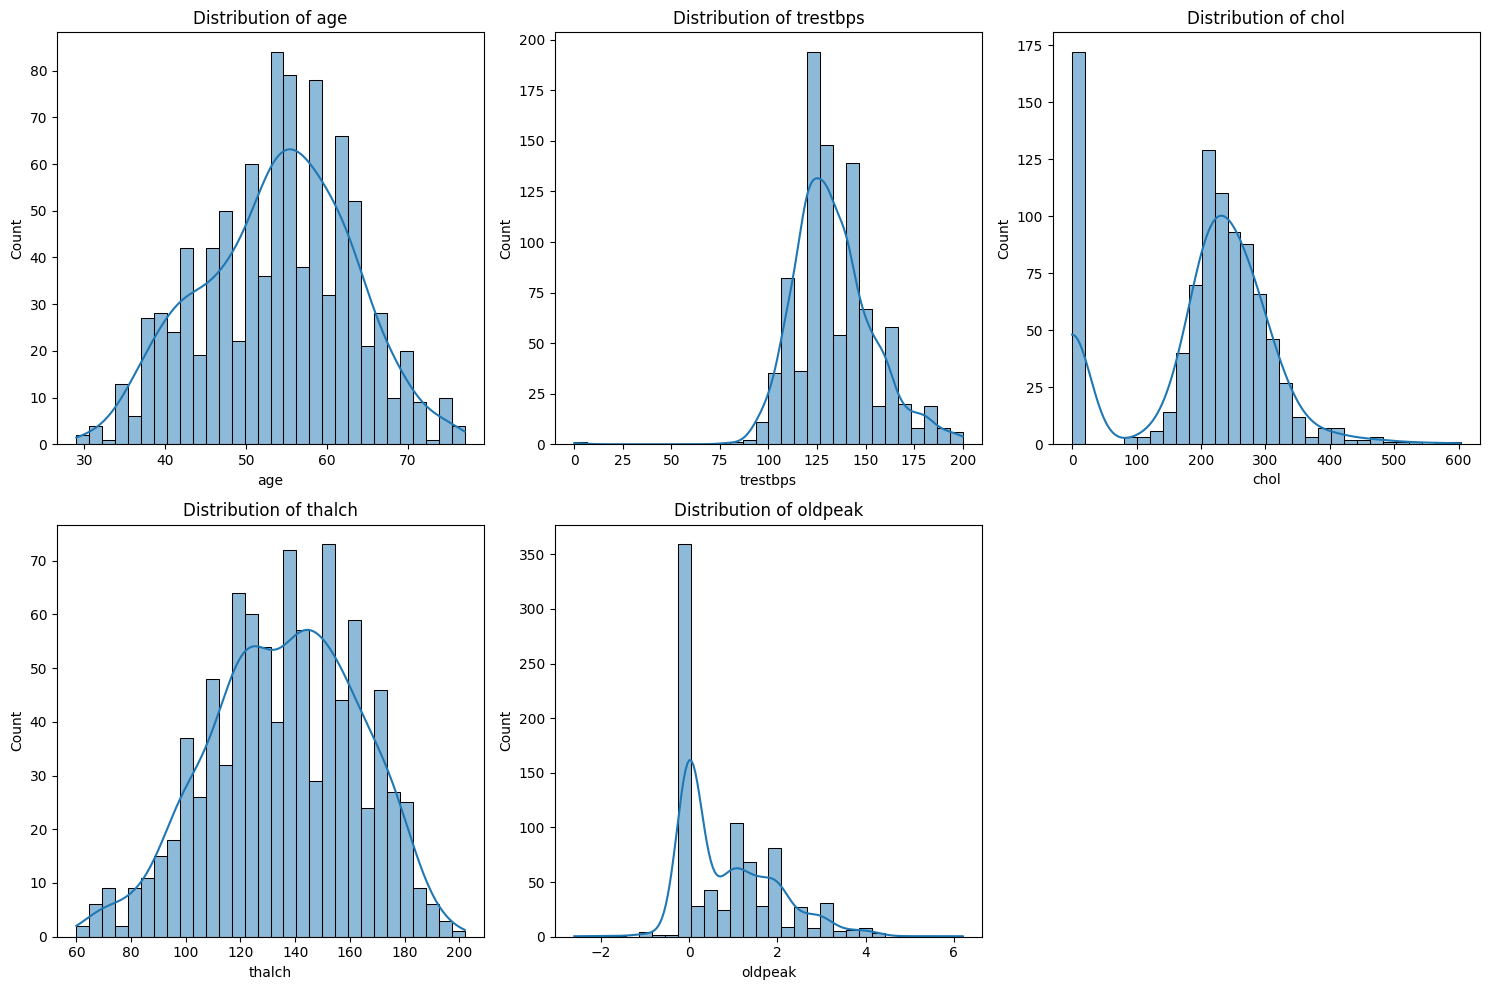

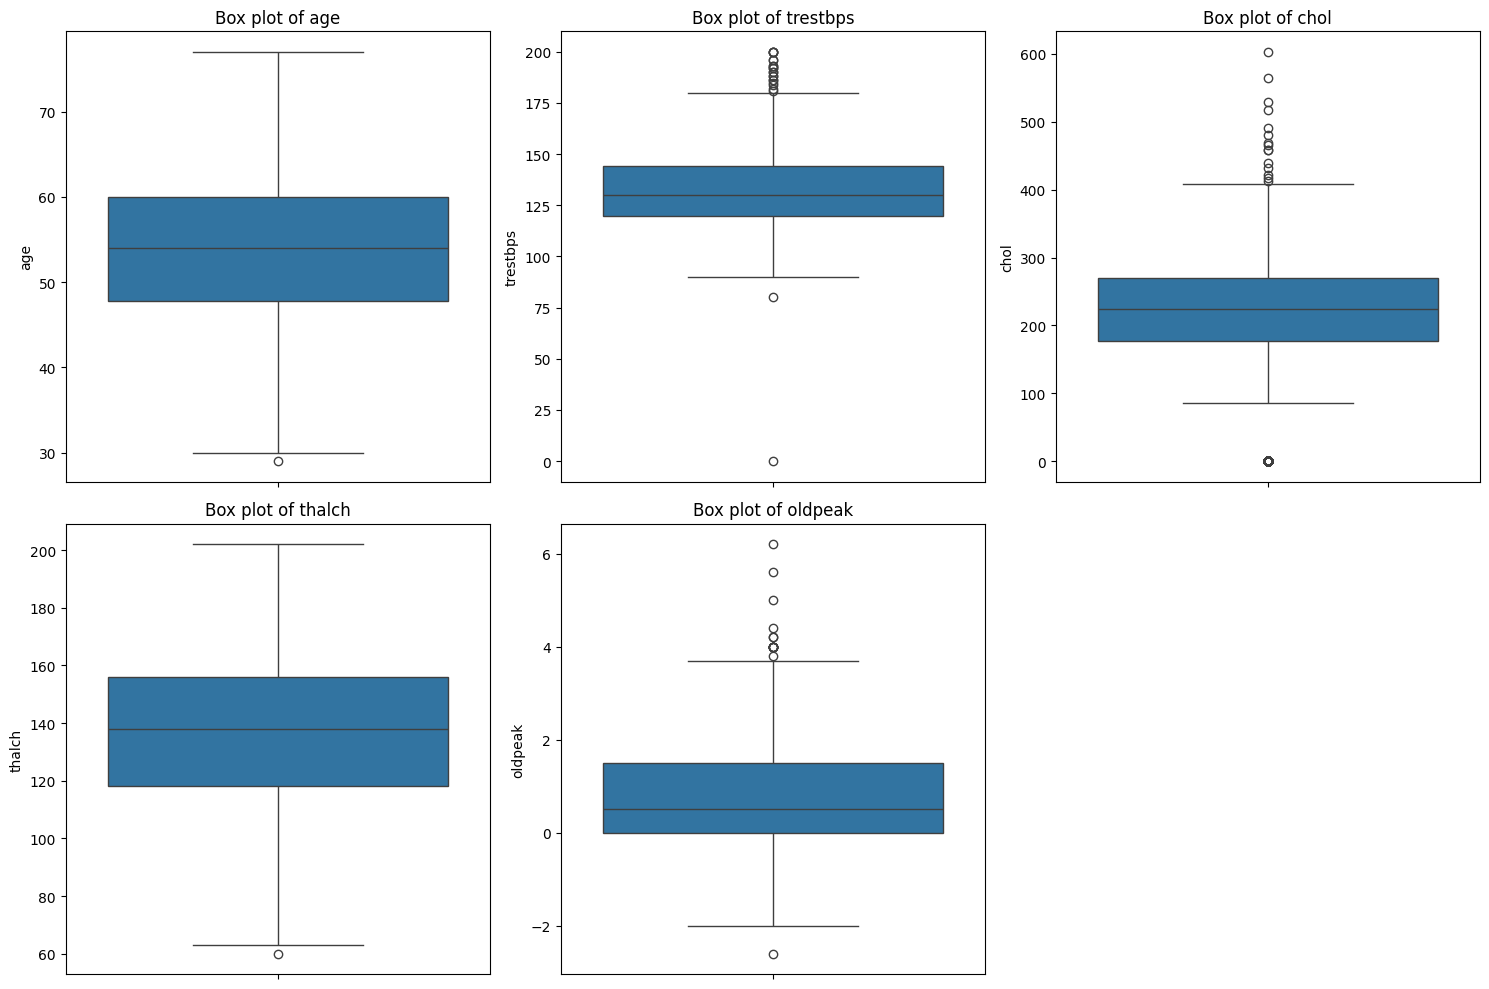

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], bins=30, kde=True) # type: ignore
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


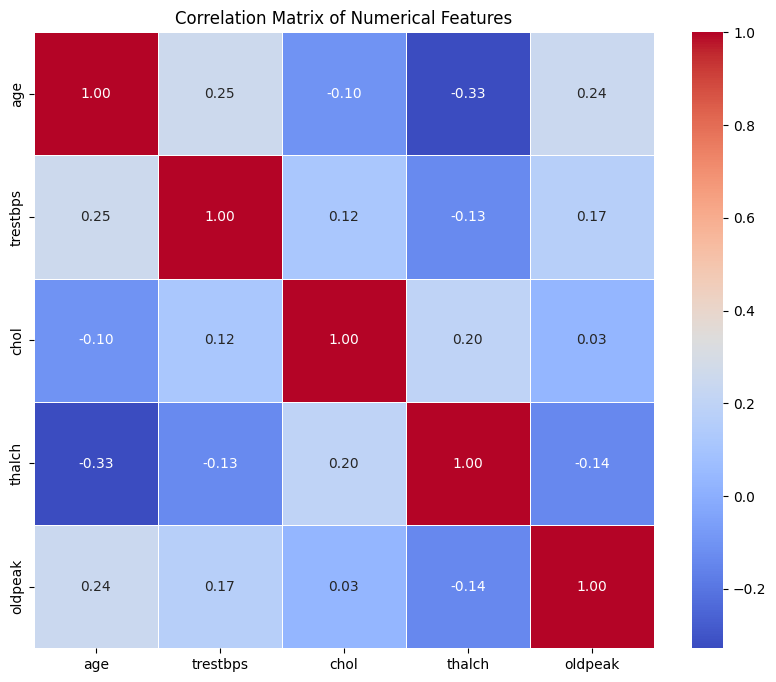

In [4]:
# Calculate the correlation matrix for numerical features
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Encode categorical variables
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['fbs'] = data['fbs'].map({True: 1, False: 0})
data['exang'] = data['exang'].map({True: 1, False: 0})

# Encode multi-category variables using one-hot encoding
onehot_cols = ['cp', 'restecg', 'slope', 'thal']
onehot_enc = OneHotEncoder( sparse_output=False)

# Fit and transform the one-hot encoder on the specified columns
encoded_features = onehot_enc.fit_transform(data[onehot_cols])

# Create a DataFrame with the encoded features
encoded_features_df = pd.DataFrame(encoded_features, columns=onehot_enc.get_feature_names_out(onehot_cols))

# Ensure the index alignment before concatenation
encoded_features_df.index = data.index

# Drop original categorical columns and concatenate encoded features
data = data.drop(columns=onehot_cols).join(encoded_features_df)

# Impute missing values in 'oldpeak' column
imputer = SimpleImputer(strategy='median')
data['oldpeak'] = imputer.fit_transform(data[['oldpeak']])

data.head()


,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0.0,2.3,0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,1,135,203,0,132,0.0,0.0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57,1,140,192,0,148,0.0,0.4,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52,1,118,186,0,190,0.0,0.0,0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57,1,110,201,0,126,1.0,1.5,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns='num')
y = data['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((726, 21), (182, 21), (726,), (182,))

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.521978021978022
Precision: 0.4767680926931512
Recall: 0.521978021978022
F1 Score: 0.49440396596775027
ROC AUC Score: 0.6419430749614621


In [8]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate the grid search object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 35}
Accuracy: 0.554945054945055


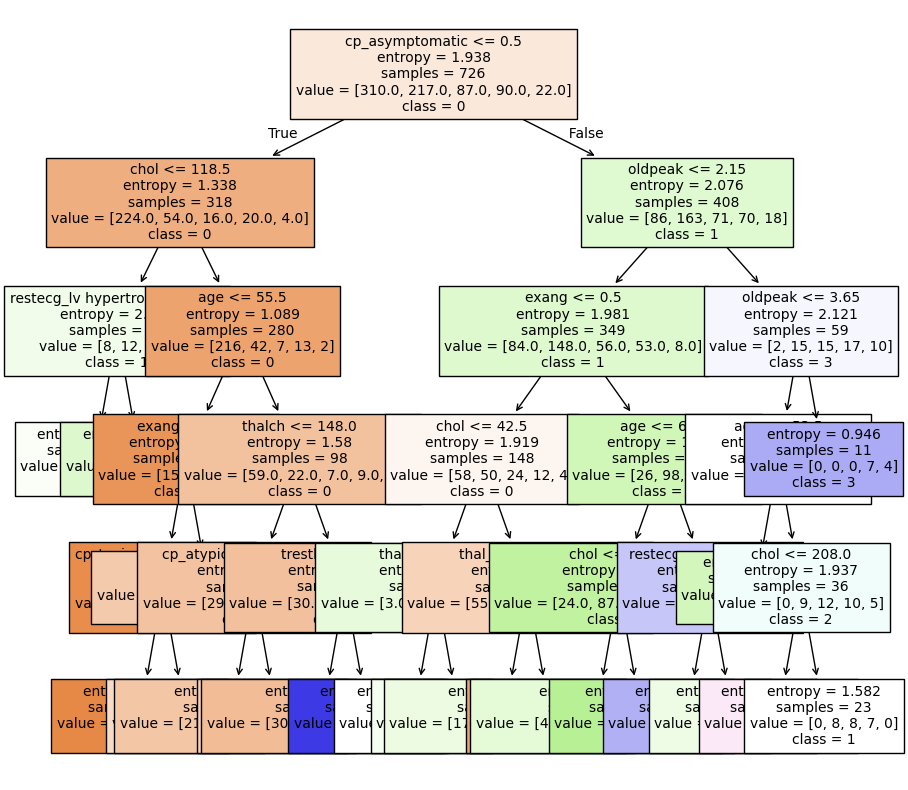

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Determine the unique class names from your target variable
class_names = [str(c) for c in sorted(y_train.unique())] # Dynamically get class names

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the decision tree
tree.plot_tree(best_model, feature_names=X_train.columns, 
               class_names=class_names, # Use dynamically generated class names
               filled=True, fontsize=10)

# Show the plot
plt.show()


# What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Some common hyperparamters of Decision Tree models are :-

1. Max Depth : A deeper tree can capture more complex patterns in the data but is more likely to overfit.
2. Min Samples Split : Higher values prevent the model from learning overly specific patterns.
3. Min Samples Leaf : Setting this to a higher number can smooth the model, which can help with reducing overfitting.
4. Max Features : Lower values can lead to less complex models, reducing overfitting but potentially missing important patterns.
5. Criterion : The choice of criterion can affect the structure of the tree and the importance placed on different splits, potentially impacting the model's performance and interpretability.


# What is the difference between the Label encoding and One-hot encoding?

Label Encoding : Label Encoding converts each category value in a column to a numerical value. It does not change the dimensionality of the dataset.

    1. Label Encoding is suitable for Ordinal categorical data where the order matters (e.g., "Low", "Medium", "High").
    2. Situations where the number of unique categories is very large and one-hot encoding would result in too many features.

One-hot Encoding : One-hot Encoding converts each category value into a new binary column. Each category is represented by a column that contains 1 for the category present in that row, and 0 otherwise.

    1. One-hot Encoding is suitable for Nominal categorical data where no ordinal relationship exists (e.g., "Red", "Green", "Blue").
    2. Algorithms that cannot directly handle categorical data, such as many linear models and distance-based models (like k-nearest neighbors).
